# Data Exploration Notebook

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv("datasets/All.csv")

In [3]:
# Visualizing the first few (5) rows of the data
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [4]:
# Checking the shape of the datset
df.shape

(36707, 80)

In [5]:
# Checking if there are null, infinity or duplicate values in the datset
print("Number of null values:", df.isna().values.sum())
print("Number of duplicate values:", df.duplicated().sum())
print("Number of infinty values:", df.infer_objects().isin([np.inf, -np.inf]).values.sum())

Number of null values: 19183
Number of duplicate values: 9754
Number of infinty values: 10


In [6]:
# Replacing infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
# Checking for new number of null after replacing infinity with null
print("Number of null values:", df.isna().values.sum())

Number of null values: 19193


In [8]:
# Dropping the duplicated values from the dataset
df.drop_duplicates(inplace=True)

In [9]:
# Checking if duplicated were dropped successfully
print(df.duplicated().values.any())
print("New data shape:", df.shape)

False
New data shape: (26953, 80)


In [10]:
# Checking for the columns that contain null values
cols_with_null = []
for col in df.columns:
    if df[col].isna().values.any():
        cols_with_null.append(col)
        print(f"Column {col} has null values")

Column avgpathtokenlen has null values
Column argPathRatio has null values
Column NumberRate_DirectoryName has null values
Column NumberRate_FileName has null values
Column NumberRate_Extension has null values
Column NumberRate_AfterPath has null values
Column Entropy_DirectoryName has null values
Column Entropy_Filename has null values
Column Entropy_Extension has null values
Column Entropy_Afterpath has null values


In [11]:
# Visualizing samples from the columns with missing data
df[cols_with_null].sample(10)

,avgpathtokenlen,argPathRatio,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
9485,4.533333,0.024096,0.466667,0.000000,NaN,-1.000000,0.884735,0.627059,0.000000,-1.000000
34583,4.750000,0.520833,0.000000,0.142857,0.172414,0.200000,0.719165,0.824482,0.824286,0.814725
15673,4.428571,0.054054,0.000000,0.000000,0.000000,-1.000000,0.758877,0.875578,1.000000,-1.000000
11393,5.400000,0.031746,0.000000,0.096774,NaN,-1.000000,NaN,0.678992,0.000000,-1.000000
31485,2.500000,0.982544,0.000000,0.156838,0.157629,0.158629,0.827729,0.576528,0.575687,0.574747
27381,3.800000,0.086957,0.000000,0.000000,0.000000,-1.000000,0.796490,0.894886,0.579380,-1.000000
12470,6.428571,0.019417,0.000000,0.000000,NaN,-1.000000,0.742170,0.625197,0.000000,-1.000000
11481,4.666666,0.058824,0.000000,0.000000,NaN,-1.000000,0.795234,0.786833,0.000000,-1.000000
13214,3.500000,0.055556,0.666667,0.000000,NaN,-1.000000,0.871049,0.745358,0.000000,-1.000000
2400,2.000000,0.181818,0.000000,0.000000,0.000000,-1.000000,NaN,0.939794,1.000000,-1.000000


### Handling Null and Infinity Values

In [14]:
# Checking for the number of null values per column
for col in df[cols_with_null]:
    print("--> {} missing values in {} column".format((df[cols_with_null][col].isna().values.sum()), col))

--> 235 missing values in avgpathtokenlen column
--> 10 missing values in argPathRatio column
--> 10 missing values in NumberRate_DirectoryName column
--> 10 missing values in NumberRate_FileName column
--> 8661 missing values in NumberRate_Extension column
--> 3 missing values in NumberRate_AfterPath column
--> 5561 missing values in Entropy_DirectoryName column
--> 200 missing values in Entropy_Filename column
--> 37 missing values in Entropy_Extension column
--> 6 missing values in Entropy_Afterpath column


In [16]:
# Replacing the missing values with the median of each of the columns
for col in cols_with_null:
    col_median = df[col].median()
    if pd.isna(col_median):
        col_median = 0
    print(f"Replacing missing values with median: '{col_median}' in {col} column")
    df[col] = df[col].fillna(col_median)

Replacing missing values with median: '4.2' in avgpathtokenlen column
Replacing missing values with median: '0.1' in argPathRatio column
Replacing missing values with median: '0.0' in NumberRate_DirectoryName column
Replacing missing values with median: '0.0563380282' in NumberRate_FileName column
Replacing missing values with median: '0.0' in NumberRate_Extension column
Replacing missing values with median: '-1.0' in NumberRate_AfterPath column
Replacing missing values with median: '0.79589301695' in Entropy_DirectoryName column
Replacing missing values with median: '0.779562958' in Entropy_Filename column
Replacing missing values with median: '0.6889835129999999' in Entropy_Extension column
Replacing missing values with median: '-1.0' in Entropy_Afterpath column


In [17]:
# Checking if there are still missing values in the data
print("Number of missing values: {}".format(df.isna().values.sum()))

Number of missing values: 0


In [18]:
# Checking the shape and samples of the data
print("Dataset shape:", df.shape, "\n")
df.head()

Dataset shape: (26953, 80) 



,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.688984,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.0,Defacement


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26953 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      26953 non-null  int64  
 1   domain_token_count               26953 non-null  int64  
 2   path_token_count                 26953 non-null  int64  
 3   avgdomaintokenlen                26953 non-null  float64
 4   longdomaintokenlen               26953 non-null  int64  
 5   avgpathtokenlen                  26953 non-null  float64
 6   tld                              26953 non-null  int64  
 7   charcompvowels                   26953 non-null  int64  
 8   charcompace                      26953 non-null  int64  
 9   ldl_url                          26953 non-null  int64  
 10  ldl_domain                       26953 non-null  int64  
 11  ldl_path                         26953 non-null  int64  
 12  ldl_filename           

# 🔍 Exploratory Data Analysis (EDA)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

### Checking the dependent variable distribution

In [20]:
df["URL_Type_obf_Type"].value_counts()

URL_Type_obf_Type
benign        7464
phishing      7359
spam          5331
Defacement    5068
malware       1731
Name: count, dtype: int64

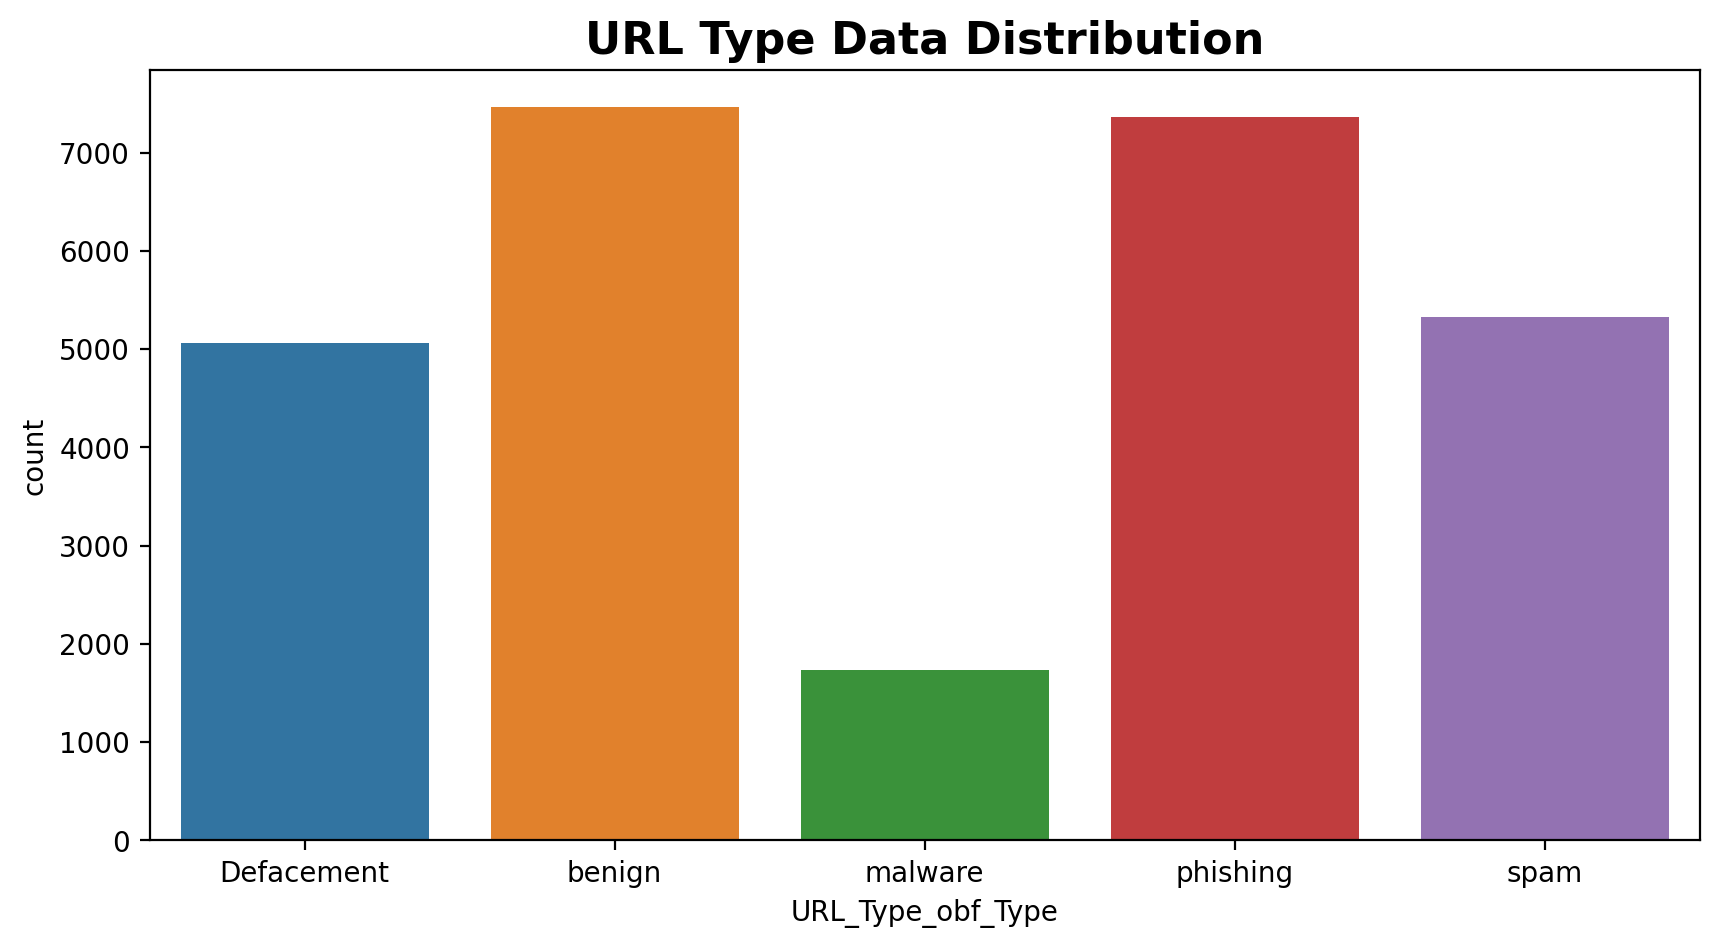

In [21]:
# Visualizing the dependent variable ("URL_Type_obf_Type") distribution
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="URL_Type_obf_Type", hue="URL_Type_obf_Type")
plt.title("URL Type Data Distribution", fontsize=16, fontweight="bold")
plt.savefig("./plots/data-distribution.png")
plt.show()

### Relationship between Top-level Domain and URL Type

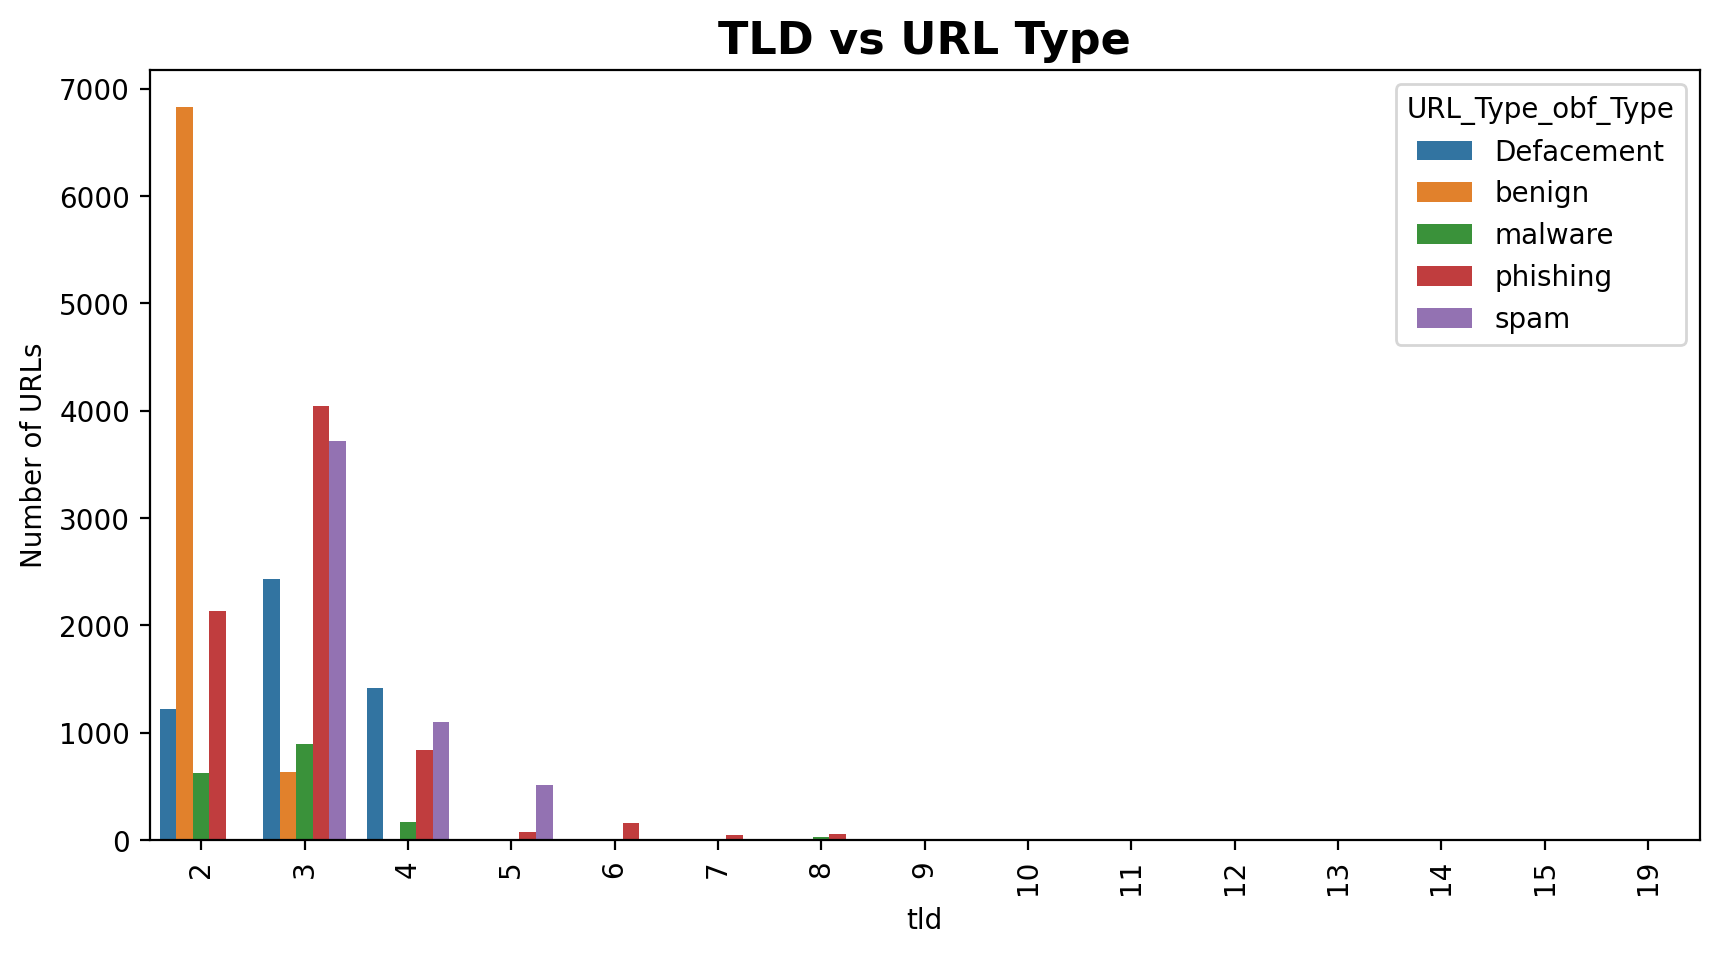

In [50]:
# Relationship between tld and URL_Type_obf_Type
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="tld", hue="URL_Type_obf_Type")
plt.title("TLD vs URL Type", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel("Number of URLs")
plt.savefig("./plots/tld-vs-url-type.png")
plt.show()

From the relationship between tld (top-level domain) and url type, most benign urls have 1 (one) tld.

### Relationship between SymbolCountDomain (number of symbols in the domain name) and URL Type

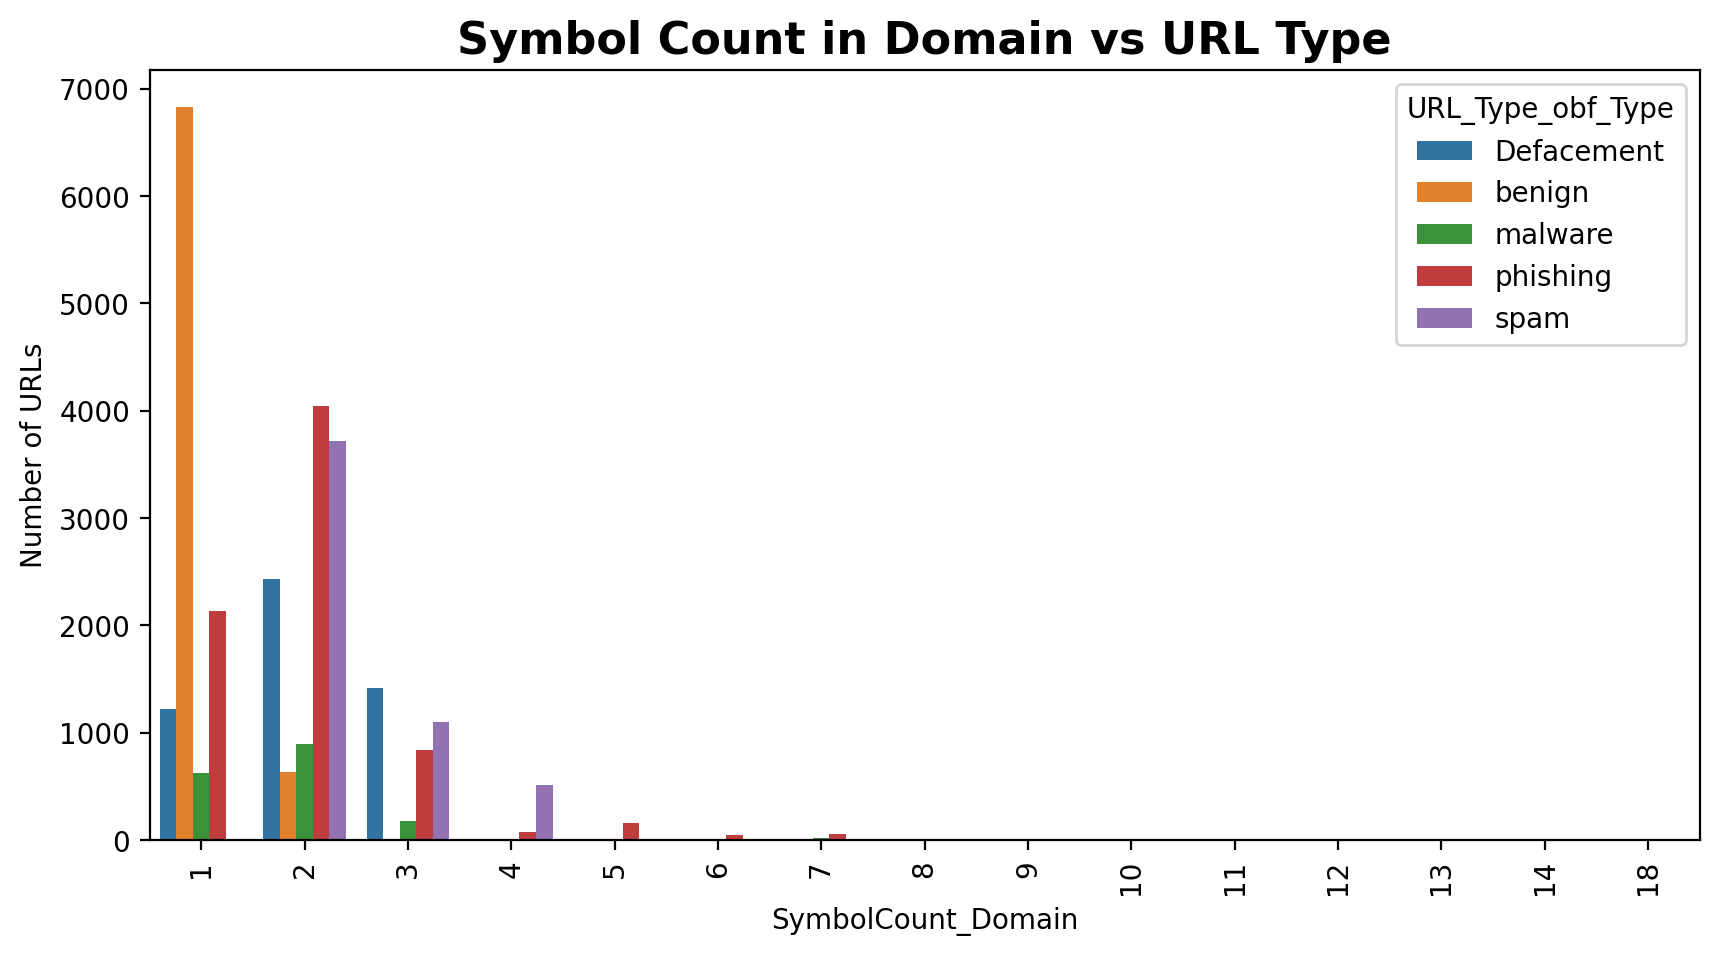

In [61]:
# Relationship between URL_Type_obf_Type and SymbolCount_Domain
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="SymbolCount_Domain", hue="URL_Type_obf_Type")
plt.title("Symbol Count in Domain vs URL Type", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel("Number of URLs")
plt.savefig("./plots/symbol-count-domain-vs-url-type.png")
plt.show()

Most benign urls have one symbol in the domain name

### Relationship between SymbolCount_URL and URL Type

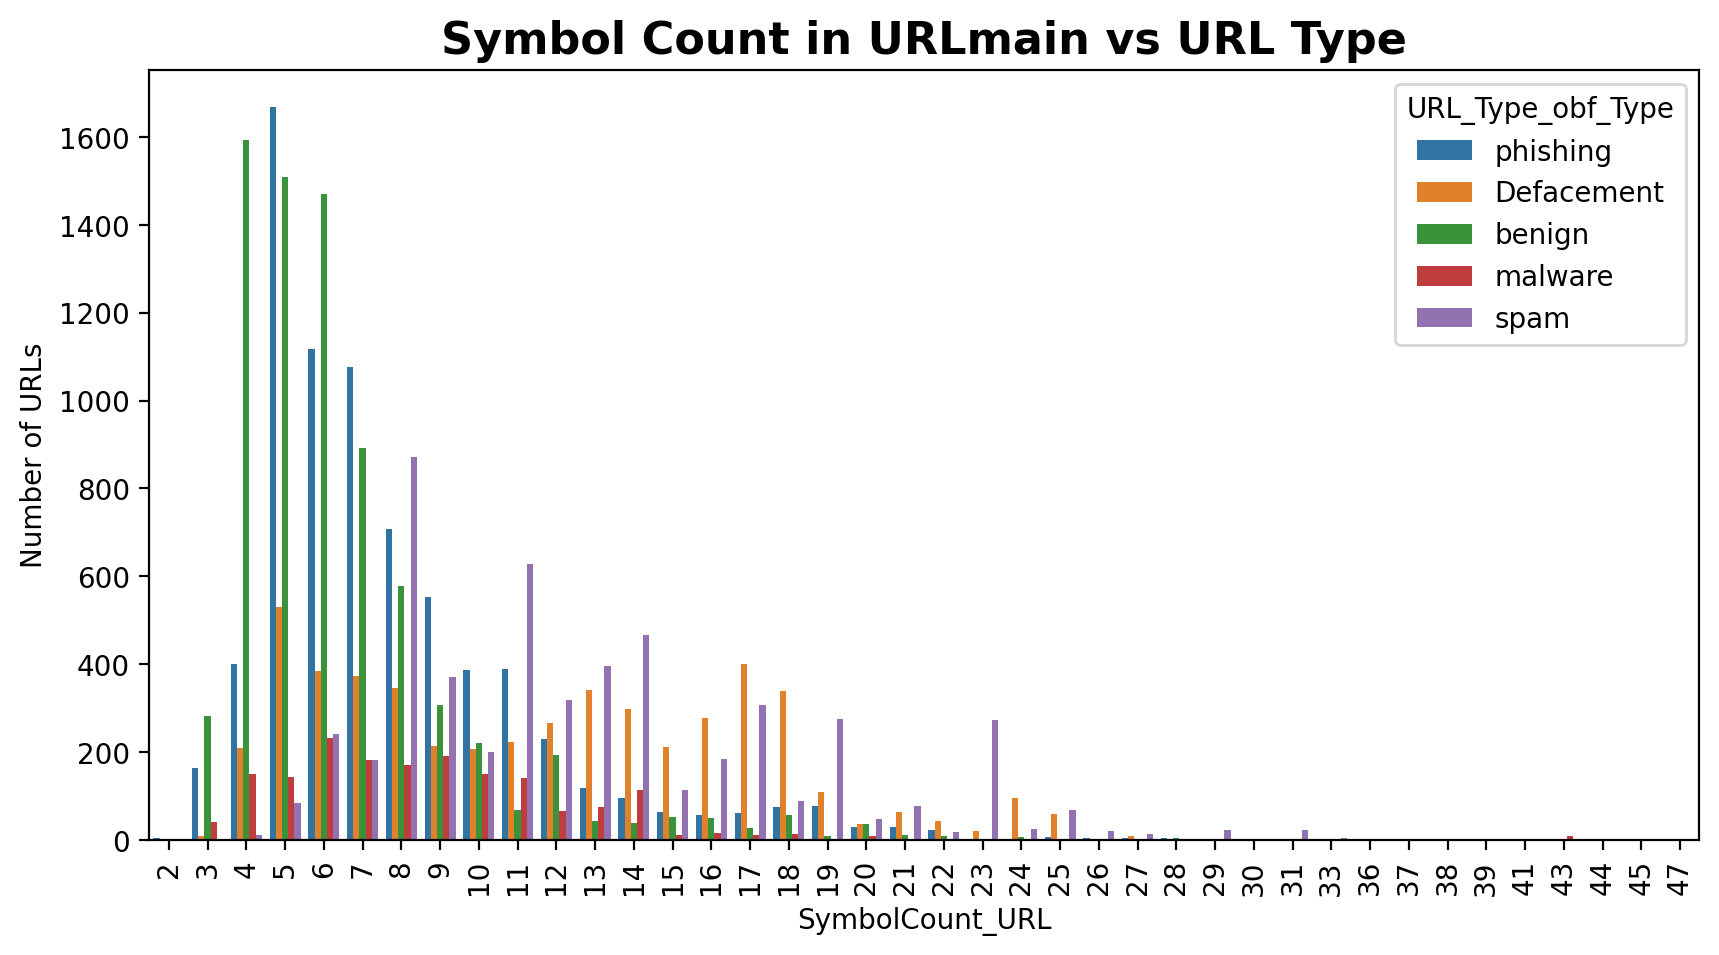

In [ ]:
# Relationship between URL_Type_obf_Type and SymbolCount_URL
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="SymbolCount_URL", hue="URL_Type_obf_Type")
plt.title("Symbol Count in URLmain vs URL Type", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel("Number of URLs")
plt.savefig("./plots/symbol-count-url-vs-url-type.png")
plt.show()

### Relationship between domainlength and URL Type

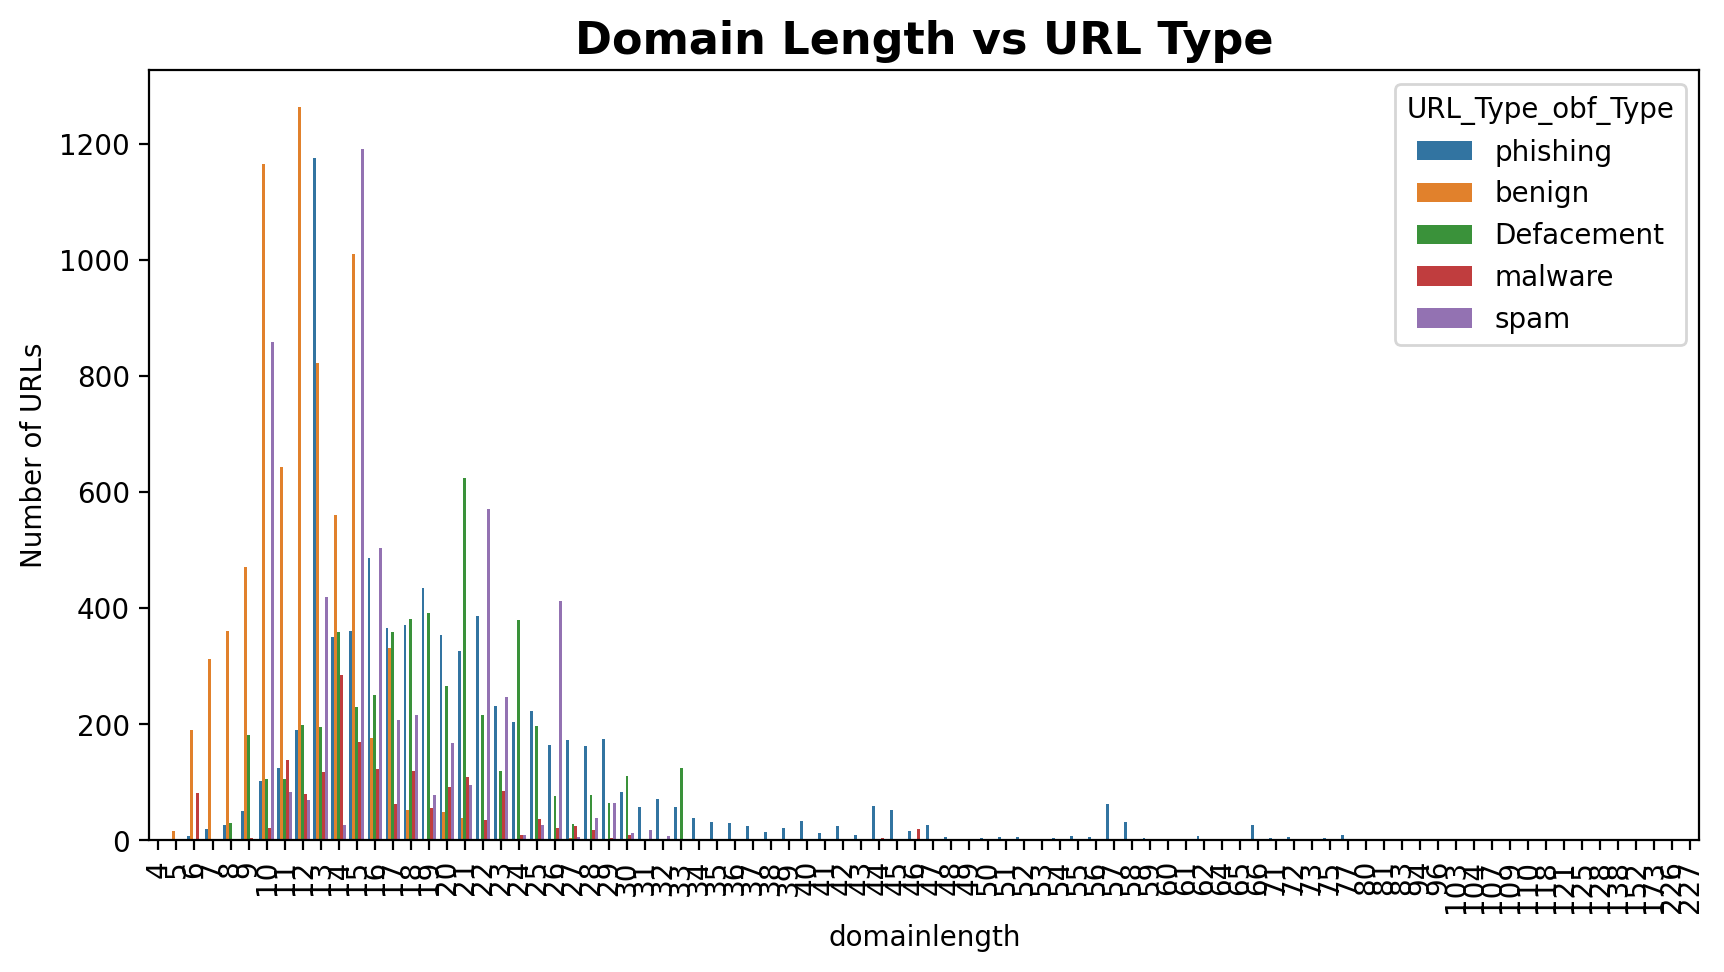

In [64]:
# Relationship between domainlength and URL Type
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="domainlength", hue="URL_Type_obf_Type")
plt.title("Domain Length vs URL Type", fontsize=16, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel("Number of URLs")
plt.savefig("./plots/domain-length-vs-url-type.png")
plt.show()

URLs with lower domain length are mostly benign

### Saving the cleaned version of the dataset

In [65]:
# Saving the cleaned dataset
df.to_csv("datasets/cleaned_data.csv")